In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/global_wines.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vintage      24997 non-null  object
 1   Country      24989 non-null  object
 2   County       20809 non-null  object
 3   Designation  17633 non-null  object
 4   Points       24997 non-null  int64 
 5   Price        23375 non-null  object
 6   Province     24989 non-null  object
 7   Title        24997 non-null  object
 8   Variety      24997 non-null  object
 9   Winery       24997 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.9+ MB


In [4]:
df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery
0,1919-01-01 00:00:00,Spain,Cava,1919 Brut Selecció,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Sparkling Blend,L'Arboc
1,1929-01-01 00:00:00,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929
2,1929-01-01 00:00:00,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929
3,1934-01-01 00:00:00,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes
4,1945-01-01 00:00:00,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Gérard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Gérard Bertrand


In [5]:
df['Year'] = pd.DatetimeIndex(df['Vintage']).year

In [6]:
df['Price'] = df['Price'].str.replace('$','')

In [7]:
df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Year
0,1919-01-01 00:00:00,Spain,Cava,1919 Brut Selecció,88,13.00,Catalonia,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Sparkling Blend,L'Arboc,1919
1,1929-01-01 00:00:00,Italy,Vernaccia di San Gimignano,NaN,87,14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,1929
2,1929-01-01 00:00:00,Italy,Sangiovese di Romagna Superiore,Prugneto,84,15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,1929
3,1934-01-01 00:00:00,Portugal,NaN,Reserva Velho,93,495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,1934
4,1945-01-01 00:00:00,France,Rivesaltes,Legend Vintage,95,350.00,Languedoc-Roussillon,Gérard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Gérard Bertrand,1945


In [8]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [9]:
df.drop(['Vintage'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24997 entries, 0 to 24996
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24989 non-null  object 
 1   County       20809 non-null  object 
 2   Designation  17633 non-null  object 
 3   Points       24997 non-null  int64  
 4   Price        23373 non-null  float64
 5   Province     24989 non-null  object 
 6   Title        24997 non-null  object 
 7   Variety      24997 non-null  object 
 8   Winery       24997 non-null  object 
 9   Year         24997 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [11]:
df.describe()

,Points,Price,Year
count,24997.000000,23373.000000,24997.000000
mean,88.486458,35.298977,2010.628995
std,3.035441,36.276425,4.233509
min,80.000000,4.000000,1821.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,780.000000,2016.000000


In [12]:
df.nunique().sort_values(ascending=False)

Title          24578
Designation    11560
Winery          9037
County           906
Variety          450
Province         319
Price            246
Year              42
Country           37
Points            21
dtype: int64

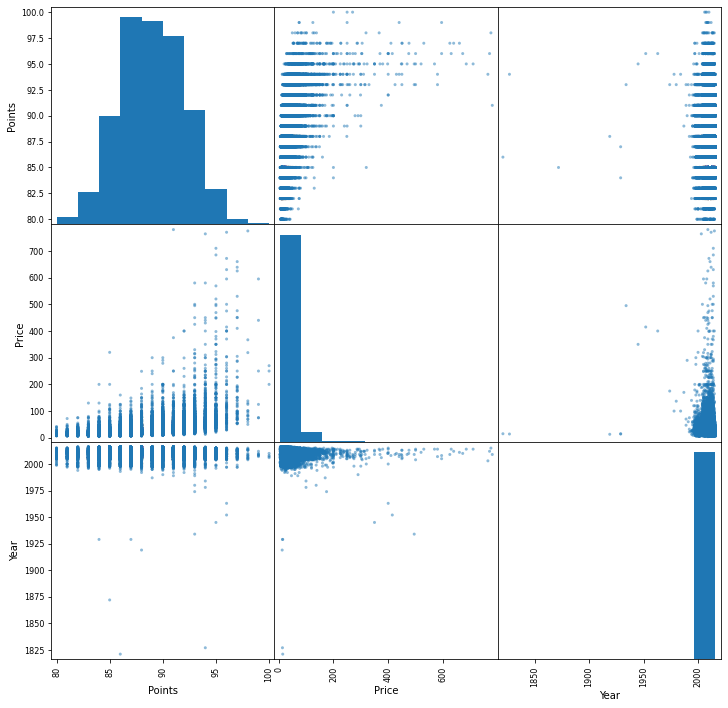

<Figure size 432x288 with 0 Axes>

In [13]:
pd.plotting.scatter_matrix(df[['Points','Price','Year']],figsize=(12,12))
plt.show()
plt.savefig('images/scatter.png')

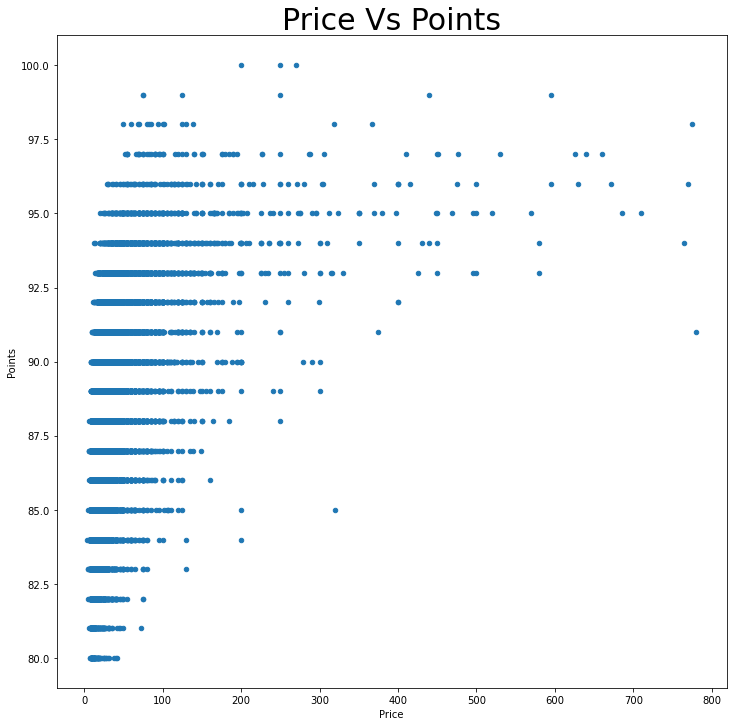

<Figure size 432x288 with 0 Axes>

In [14]:
df.plot(x='Price', y='Points', kind='scatter',figsize=(12,12))
plt.title('Price Vs Points',fontsize=30)
plt.show()
plt.savefig('images/priceVspoints.png')

In [15]:
df.groupby("Country").Variety.max().head(12)

Country
Argentina             White Blend
Australia               Zinfandel
Austria                  Zweigelt
Brazil                     Tannat
Bulgaria              White Blend
Canada                Vidal Blanc
Chile                 White Blend
Croatia                  Zlahtina
Czech Republic     Welschriesling
England           Sparkling Blend
France                White Blend
Georgia               White Blend
Name: Variety, dtype: object

In [16]:
df_pie = (df['Country'].value_counts()/len(df)).reset_index()

In [17]:
df_pie2=df_pie[df_pie['Country'] > 0.01]

In [18]:
df_pie2.loc[-1] = ['Other',0.019842]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
df_pie2

,index,Country
0,US,0.423091
1,France,0.162339
2,Italy,0.148178
3,Spain,0.050206
4,Portugal,0.044325
5,Chile,0.036964
6,Argentina,0.030404
7,Austria,0.027683
8,Australia,0.018602
9,Germany,0.016762


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  import sys


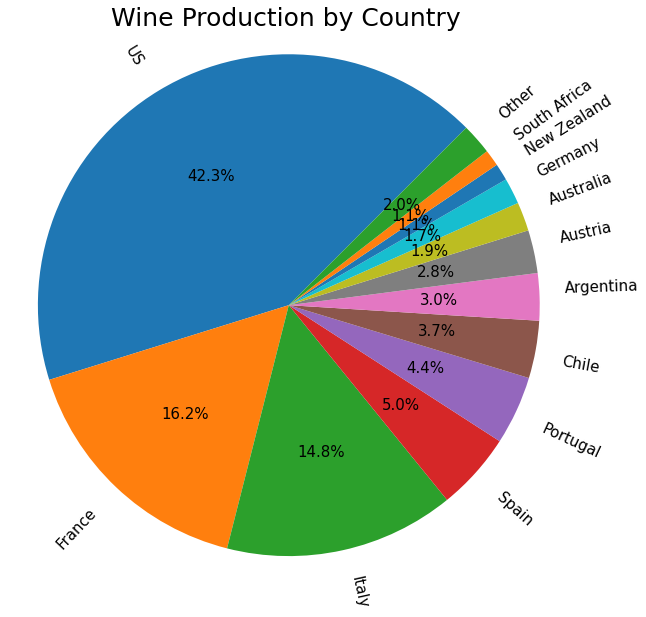

In [20]:
labels = df_pie2['index']

fig1, ax1 = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 15})
#plt.title('Wine Production by Country')
ax1.set_title('Wine Production by Country',fontsize= 25)
ax1.pie(df_pie2['Country'], labels=labels, autopct='%1.1f%%',rotatelabels=True,startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('images/wine_production_country.png')
plt.show()

In [21]:
df_top_country = df[df['Country'].isin(['US', 'France','Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Austria',           
'Australia', 'Germany','New Zealand','South Africa'])]

In [22]:
df_top_country.head()

,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Year
0,Spain,Cava,1919 Brut Selecció,88,13.0,Catalonia,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Sparkling Blend,L'Arboc,1919
1,Italy,Vernaccia di San Gimignano,NaN,87,14.0,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,1929
2,Italy,Sangiovese di Romagna Superiore,Prugneto,84,15.0,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,1929
3,Portugal,NaN,Reserva Velho,93,495.0,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,1934
4,France,Rivesaltes,Legend Vintage,95,350.0,Languedoc-Roussillon,Gérard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Gérard Bertrand,1945


<Figure size 432x288 with 0 Axes>

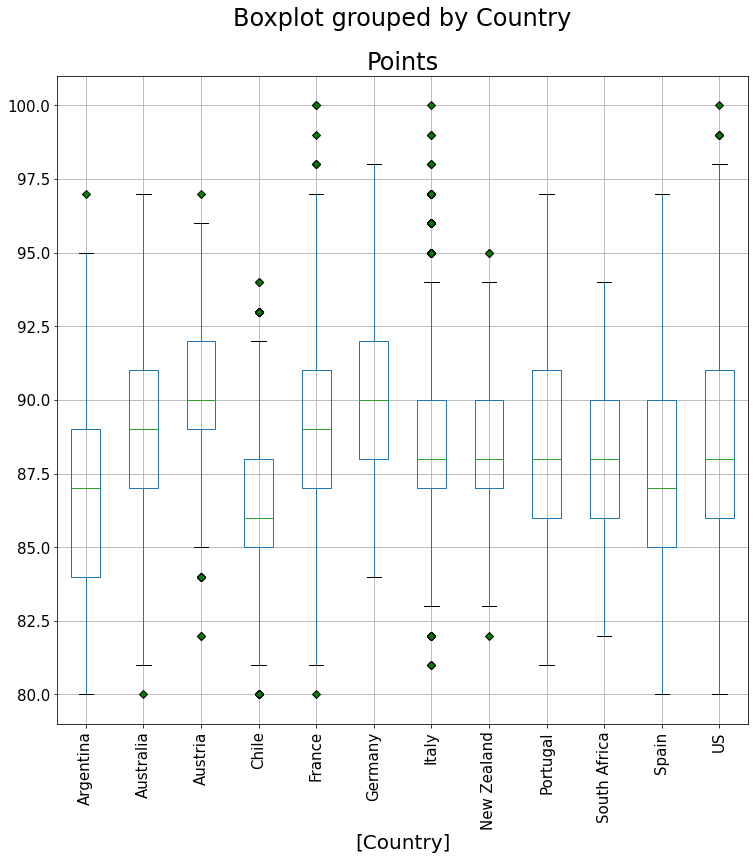

In [23]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure()
plt.rcParams.update({'font.size': 20})

df_top_country.boxplot(column=['Points'], by=['Country'],fontsize=15,rot=90,figsize=(12,12),flierprops=green_diamond)
plt.savefig('images/box_country_points.png')
plt.show()

In [24]:
df_top_variety = df[df['Variety'].isin(['Pinot Noir','Chardonnay','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend','Riesling', 'Sauvignon Blanc','Syrah', 'Rosé', 'Merlot', 'Malbec','Nebbiolo'])]

<Figure size 432x288 with 0 Axes>

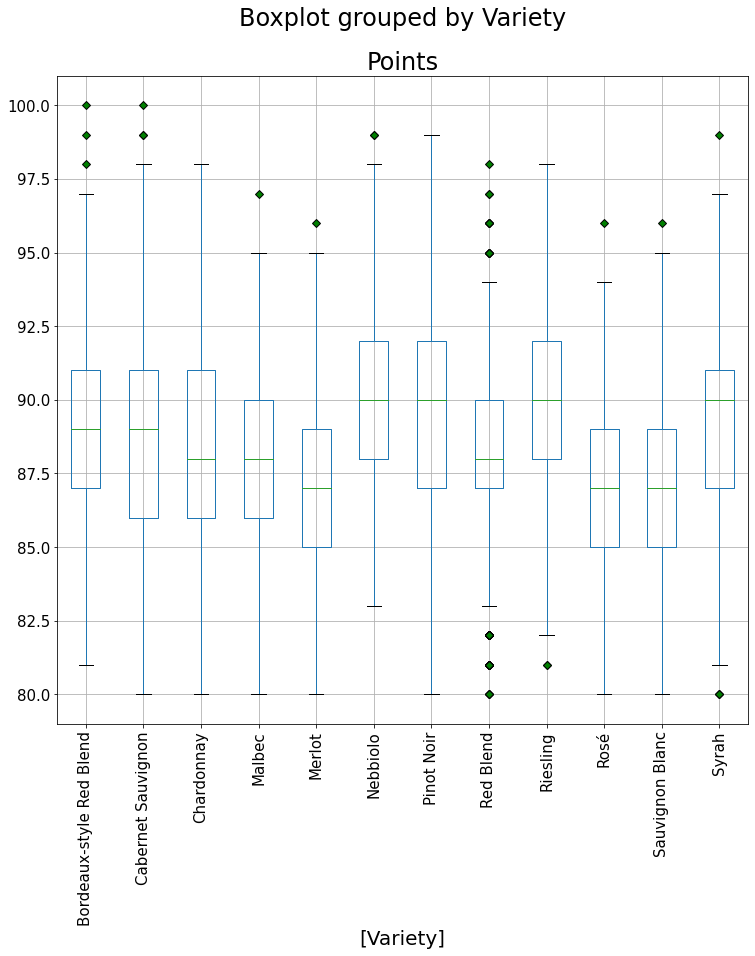

In [25]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure()
plt.rcParams.update({'font.size': 20})

df_top_variety.boxplot(column=['Points'], by=['Variety'],fontsize=15,rot=90,figsize=(12,12),flierprops=green_diamond)
plt.savefig('images/box_variety_points.png')
plt.show()

In [26]:
df['Province'].value_counts().nlargest(12)

California          7066
Washington          1667
Tuscany             1180
Bordeaux            1164
Oregon              1065
Burgundy             792
Northern Spain       791
Piedmont             724
Mendoza Province     658
New York             526
Veneto               435
Alsace               430
Name: Province, dtype: int64

In [27]:
df_top_province = df[df['Province'].isin(['California',
'Washington',
'Tuscany',
'Bordeaux',
'Oregon',
'Burgundy',
'Northern Spain',
'Piedmont',
'Mendoza Province',
'New York',
'Veneto',
'Alsace'])]


<Figure size 432x288 with 0 Axes>

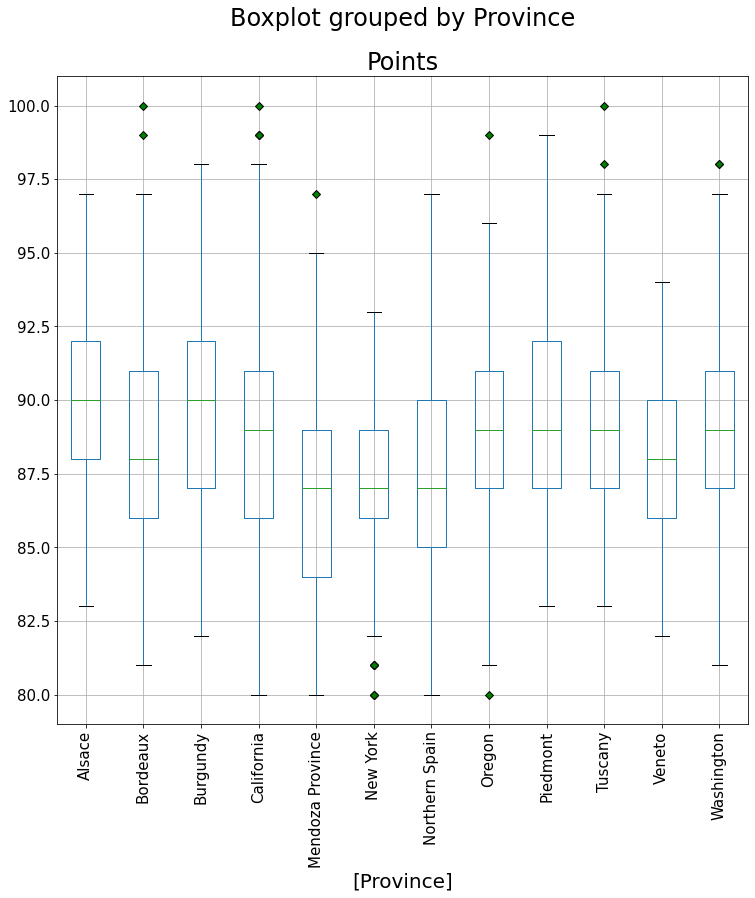

In [28]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure()
plt.rcParams.update({'font.size': 20})

df_top_province.boxplot(column=['Points'], by=['Province'],fontsize=15,rot=90,figsize=(12,12),flierprops=green_diamond)
plt.savefig('images/box_province_points.png')
plt.show()

<Figure size 432x288 with 0 Axes>

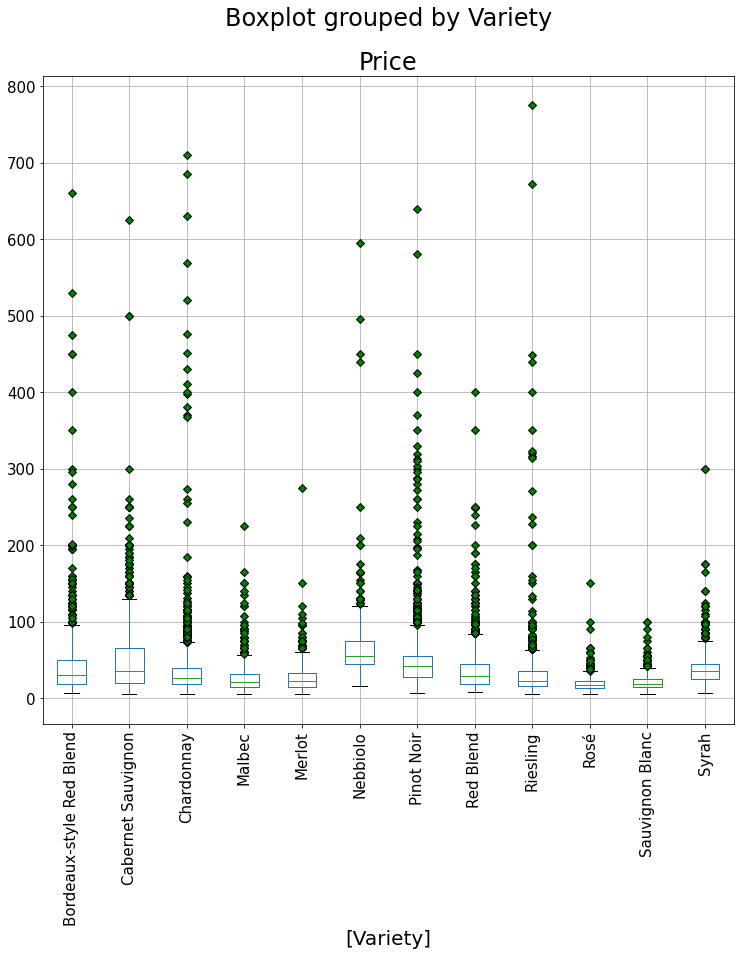

In [29]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure()
plt.rcParams.update({'font.size': 20})

df_top_variety.boxplot(column=['Price'], by=['Variety'],fontsize=15,rot=90,figsize=(12,12),flierprops=green_diamond)
plt.savefig('images/box_variety_price.png')
plt.show()

<Figure size 432x288 with 0 Axes>

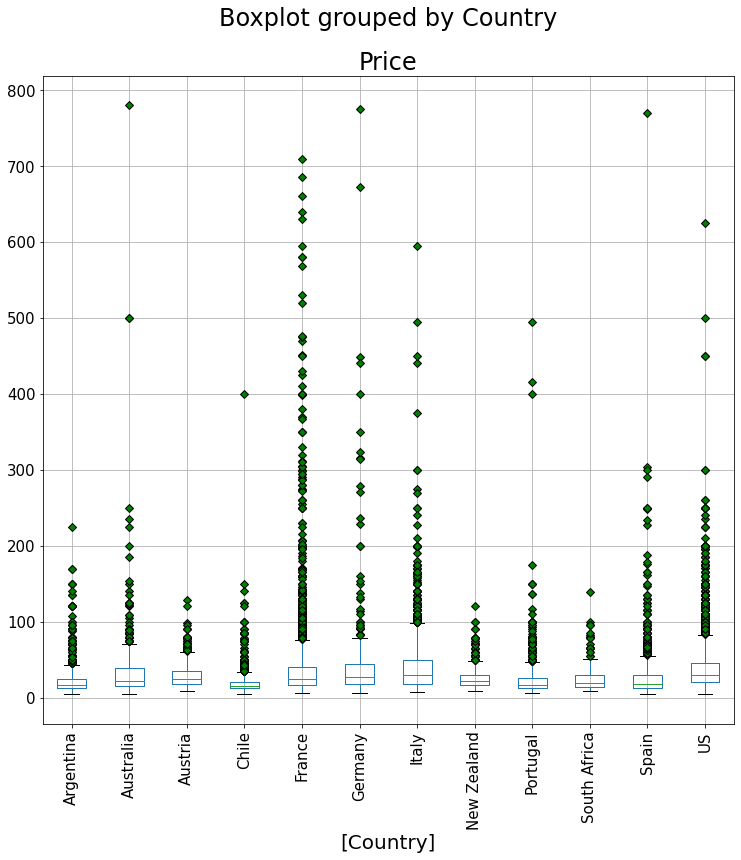

In [30]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure()
plt.rcParams.update({'font.size': 20})
df_top_country.boxplot(column=['Price'], by=['Country'],fontsize=15,rot=90,figsize=(12,12),flierprops=green_diamond)
plt.savefig('images/box_country_price.png')
plt.show()

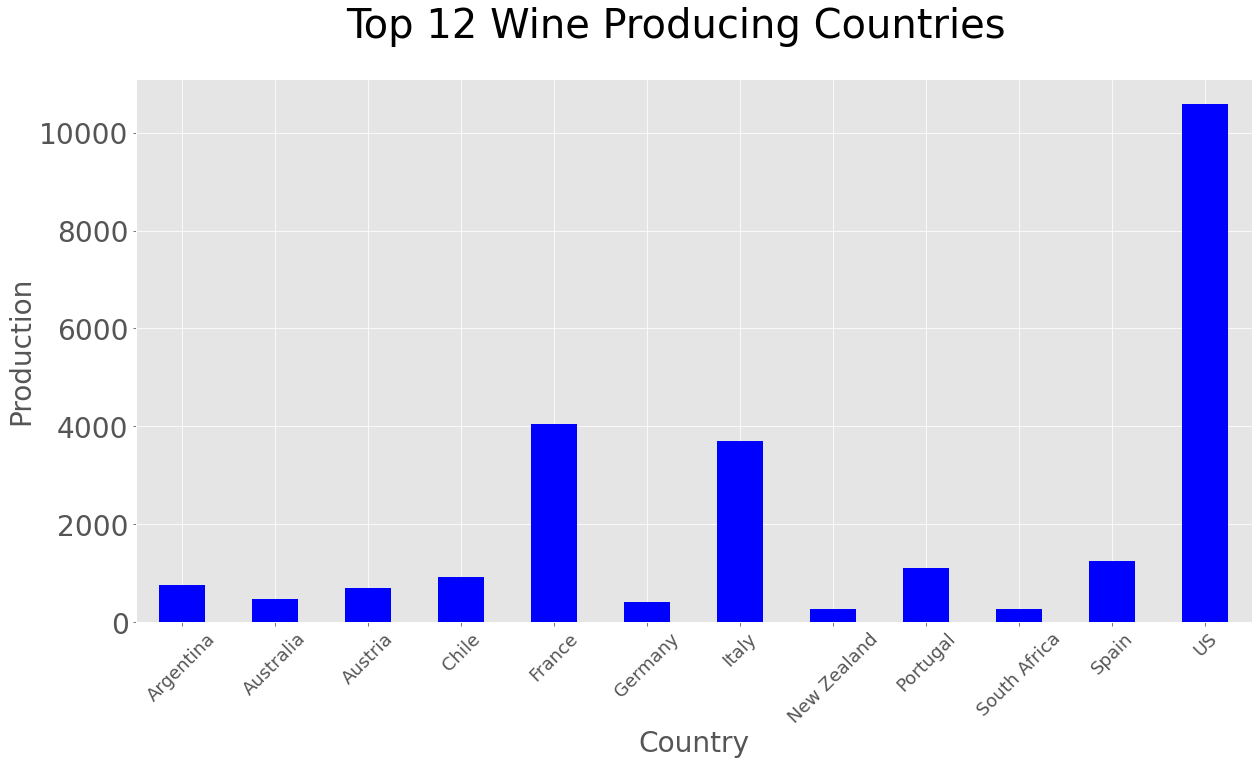

In [31]:
plt.style.use('ggplot')
df_wine_production = df_top_country[['Country']].groupby(['Country']).size()
fig, ax = plt.subplots(figsize=(20,10))

df_wine_production.plot(kind='bar',color='blue')

plt.xlabel('Country',fontsize=28)
plt.ylabel('Production',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('Top 12 Wine Producing Countries',fontsize=40)
plt.savefig('images/top_12_countries.png')
plt.show()

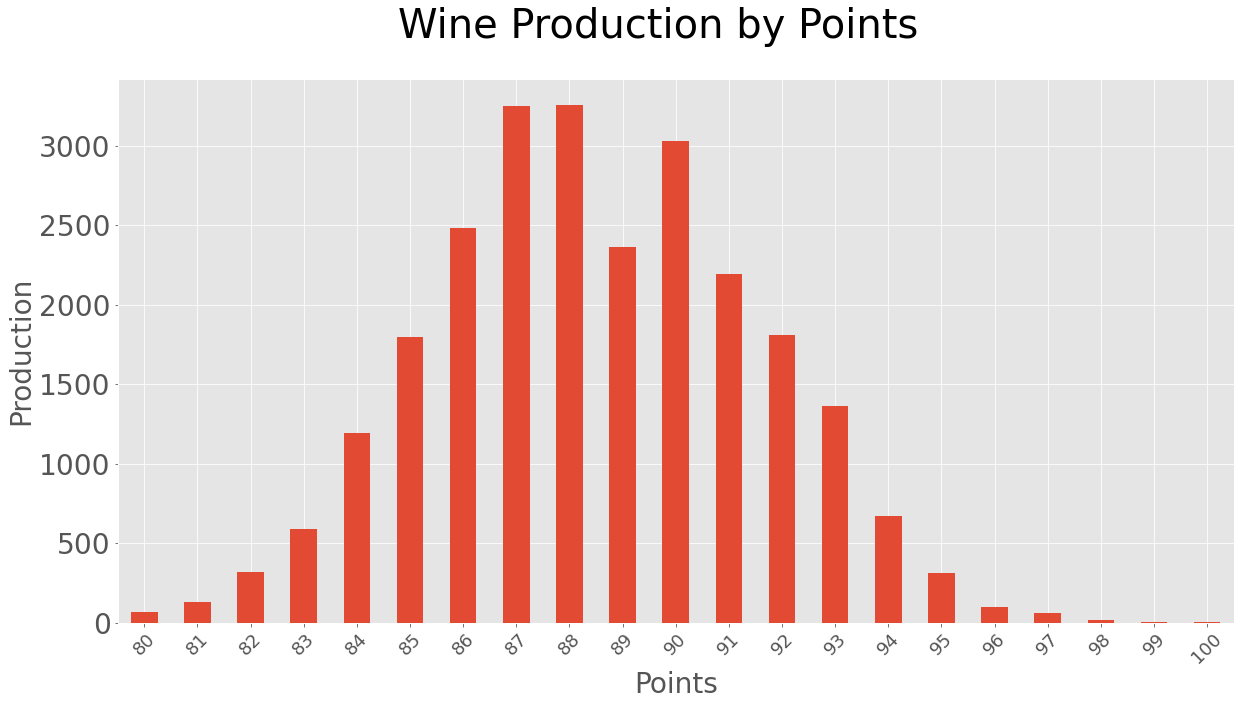

In [32]:
plt.style.use('ggplot')
df_points = df[['Points']].groupby(['Points']).size()
fig, ax = plt.subplots(figsize=(20,10))

df_points.plot(kind='bar')

plt.xlabel('Points',fontsize=28)
plt.ylabel('Production',fontsize=28)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('Wine Production by Points',fontsize=40)
plt.savefig('images/Wine_production_by_points.png')
plt.show()

In [33]:
df['Variety'].value_counts()

Pinot Noir                    2648
Chardonnay                    2294
Cabernet Sauvignon            1845
Red Blend                     1726
Bordeaux-style Red Blend      1376
                              ... 
Sciaccerellu                     1
Chardonnay-Sauvignon Blanc       1
Viognier-Gewürztraminer          1
Seyval Blanc                     1
Brachetto                        1
Name: Variety, Length: 450, dtype: int64

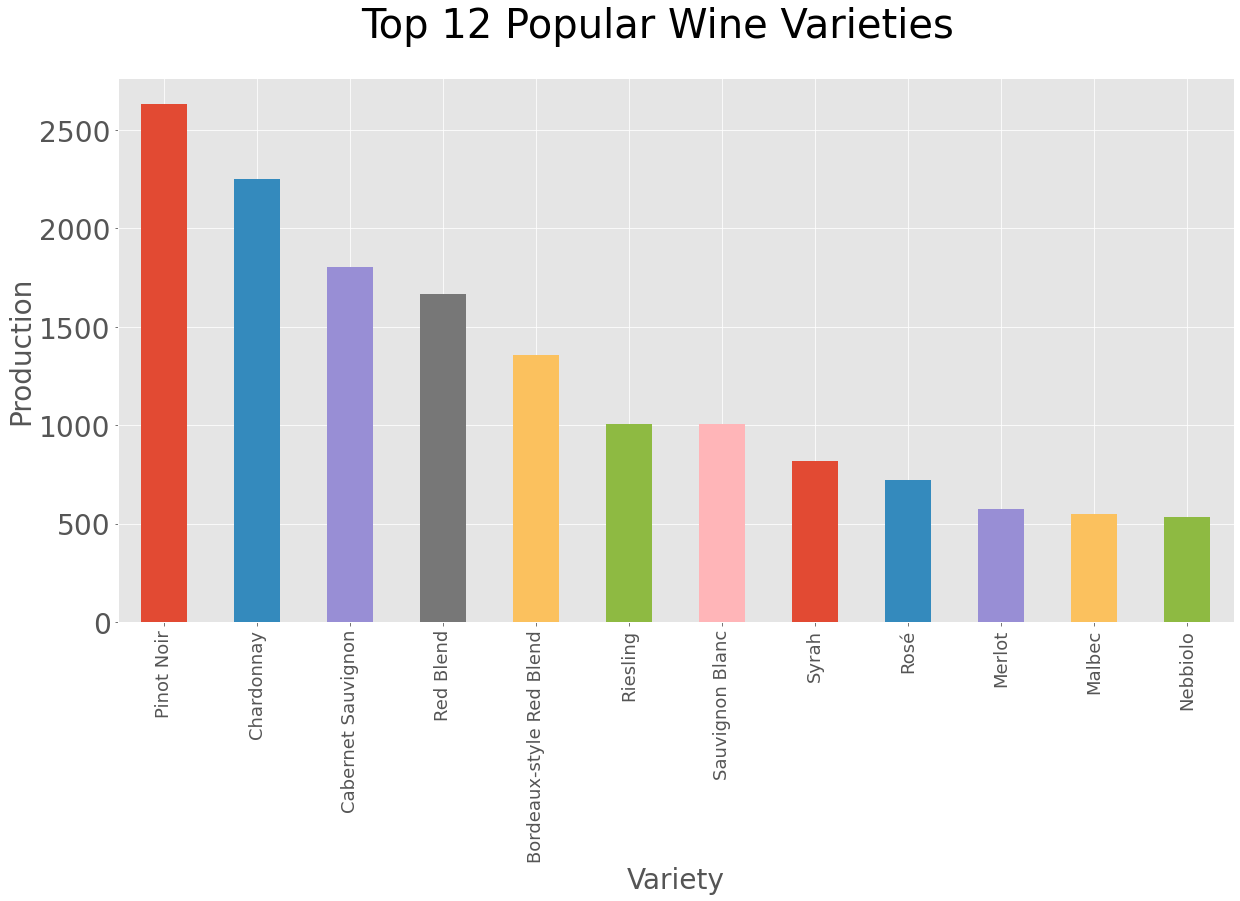

In [34]:
plt.style.use('ggplot')
df_variety = df_top_country[['Variety']].groupby(['Variety']).size().nlargest(12)
fig, ax = plt.subplots(figsize=(20,10))

df_variety.plot(kind='bar',color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C4','C5'])

plt.xlabel('Variety',fontsize=28)
plt.ylabel('Production',fontsize=28)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(rotation=0, fontsize=28)

plt.suptitle('Top 12 Popular Wine Varieties',fontsize=40)

plt.savefig('images/top_12_Wine_Varities.png')
plt.show()

In [35]:
df.to_csv('data/wine_final.csv')

In [36]:
df.head()

,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Year
0,Spain,Cava,1919 Brut Selecció,88,13.0,Catalonia,L'Arboc NV 1919 Brut Selecció Sparkling (Cava),Sparkling Blend,L'Arboc,1919
1,Italy,Vernaccia di San Gimignano,NaN,87,14.0,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,1929
2,Italy,Sangiovese di Romagna Superiore,Prugneto,84,15.0,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,1929
3,Portugal,NaN,Reserva Velho,93,495.0,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,1934
4,France,Rivesaltes,Legend Vintage,95,350.0,Languedoc-Roussillon,Gérard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Gérard Bertrand,1945
